## Gender Stats

Since the GenderAPI data seems a bit more comprehensive ([see here](./gender_methods.ipynb)), that's what we'll use going forward. This first block recapitulates what I did in the beginning of the last notebook.

In [4]:
using StatPlots


include("../src/dataimport.jl") # `importauthors()` and `getgenderprob()` functions

bio = importauthors("../data/pubdata/bio.csv", "bio")
comp = importauthors("../data/pubdata/comp.csv", "comp")
alldata = vcat(bio, comp)
bio = 0 # to free up memory
comp = 0

alldata[:Pfemale], alldata[:Count] = getgenderprob(alldata, "../data/genders/genderAPI_genders.json", :Author_First_Name)

pool!(alldata)
alldata = alldata[!isna(alldata[:Journal]), :] # remove rows where there's no Journal

alldata[1:5, :]


5×11 DataFrames.DataFrame
│ Row │ ID       │ Date       │ Journal                                       │
├─────┼──────────┼────────────┼───────────────────────────────────────────────┤
│ 1   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 2   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 3   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 4   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 5   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │

│ Row │ Author_First_Name │ Author_Last_Name │ Author_Initials │ Position      │
├─────┼───────────────────┼──────────────────┼─────────────────┼───────────────┤
│ 1   │ "Suwit"           │ "Chotinun"       │ NA              │ "first"       │
│ 2   │ "Prapas"          │ "Patchanee"      │ NA              │ "last"        │
│ 3   │ "Suvichai"        │ "Rojanasthien"   │ NA              │ "second"      │
│ 4   │ "Pakpoom"         │ "Tadee"          │ NA              │ "penultimate" │
│ 5   │ "Fred"            │ "Unger"          │ NA              │ "other"       │

│ Row │ Title                                                                                                                                                                                   │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ 1   │ "PREVALENCE AND ANTIMICROBIAL RESISTANCE OF SALMONELLA ISOLATED FROM CARCASSES, PROCESSING FACILITIES AND THE ENVIRONMENT SURROUNDING SMALL SCALE POULTRY SLAUGHTERHOUSES IN THAILAND." │
│ 2   │ "PREVALENCE AND ANTIMICROBIAL RESISTANCE OF SALMONELLA ISOLATED FROM CARCASSES, PROCESSING FACILITIES AND THE ENVIRONMENT SURROUNDING SMALL SCALE POULTRY SLAUGHTERHOUSES IN THAILAND." │
│ 3   │ "PREVALENCE AND ANTIMICROBIAL RESISTANCE OF SALMONELLA ISOLATED FROM CARCASSES, PROCESSING FACILITIES AND THE ENVIRONMENT SURROUNDING SMALL SCALE POULTRY SLAUGHTERHOUSES IN THAILAND." │
│ 4   │ "PREVALENCE AND ANTIMICROBIAL RESISTANCE OF SALMONELLA ISOLATED FROM CARCASSES, PROCESSING FACILITIES AND THE ENVIRONMENT SURROUNDING SMALL SCALE POULTRY SLAUGHTERHOUSES IN THAILAND." │
│ 5   │ "PREVALENCE AND ANTIMICROBIAL RESISTANCE OF SALMONELLA ISOLATED FROM CARCASSES, PROCESSING FACILITIES AND THE ENVIRONMENT SURROUNDING SMALL SCALE POULTRY SLAUGHTERHOUSES IN THAILAND." │

│ Row │ Dataset │ Pfemale │ Count │
├─────┼─────────┼─────────┼───────┤
│ 1   │ "bio"   │ 0.02    │ 306   │
│ 2   │ "bio"   │ 0.03    │ 58    │
│ 3   │ "bio"   │ NA      │ 0     │
│ 4   │ "bio"   │ 0.02    │ 116   │
│ 5   │ "bio"   │ 0.04    │ 49394 │

In [6]:
means = by(alldata, [:Dataset], df -> DataFrame(MeanPF = mean(dropna(df[:Pfemale]))))

2×2 DataFrames.DataFrame
│ Row │ Dataset │ MeanPF   │
├─────┼─────────┼──────────┤
│ 1   │ "bio"   │ 0.340488 │
│ 2   │ "comp"  │ 0.296334 │


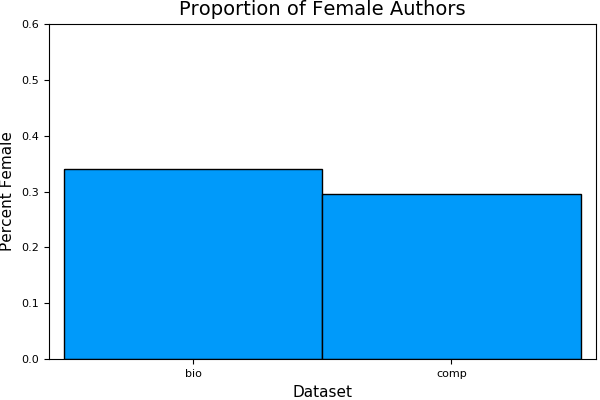

In [20]:
bar(means, :MeanPF,
        xaxis=("Dataset", ([1,2], means[:Dataset])),
        yaxis=("Percent Female", (0, 0.6), 0:0.1:0.6),
        legend=false,
        grid=false,
        title="Proportion of Female Authors")

Currently, the author positions are ordered in the dataframe in alphabetical order (first, last, other, penultimate, second), so I'm going to define a "less than" function to do a custom sort (thanks [Stack Overflow](http://stackoverflow.com/questions/37932963/efficient-custom-ordering-in-julia-dataframes)!). This function needs to return true for the call `x < y` for the strings in the following order: ["first", "second", "other", "penultimate", "last"]. 

In [24]:
order = Dict(key => ix for (ix, key) in enumerate(["first", "second", "other", "penultimate", "last"]))


function authororder(pos1, pos2)
    return order[pos1] < order[pos2]
end

println(authororder("first", "second"))
println(authororder("second", "first"))

true
false


So now we can sort the dataframe using our custom function and the `lt` keyword.

In [31]:
sort!(alldata, cols=:Position, lt=authororder)
alldata[1:5, 1:7]

5×7 DataFrames.DataFrame
│ Row │ ID       │ Date       │ Journal                                       │
├─────┼──────────┼────────────┼───────────────────────────────────────────────┤
│ 1   │ 26466425 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 2   │ 26466421 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 3   │ 26466418 │ 2015-10-15 │ "Southeast Asian J. Trop. Med. Public Health" │
│ 4   │ 26460400 │ 2015-10-11 │ "Ann. Hum. Genet."                            │
│ 5   │ 26255944 │ 2015-08-10 │ "Mutat. Res."                                 │

│ Row │ Author_First_Name │ Author_Last_Name │ Author_Initials │ Position │
├─────┼───────────────────┼──────────────────┼─────────────────┼──────────┤
│ 1   │ "Suwit"           │ "Chotinun"       │ NA              │ "first"  │
│ 2   │ "Chariya"         │ "Chomvarin"      │ NA              │ "first"  │
│ 3   │ "Meng-Bin"        │ "Tang"           │ NA              │ "first"  │
│ 4   │ "Christopher"     │ "Steele"         │ "D"             │ "first"  │
│ 5   │ "Sara"            │ "Skiöld"         │ NA              │ "first"  │


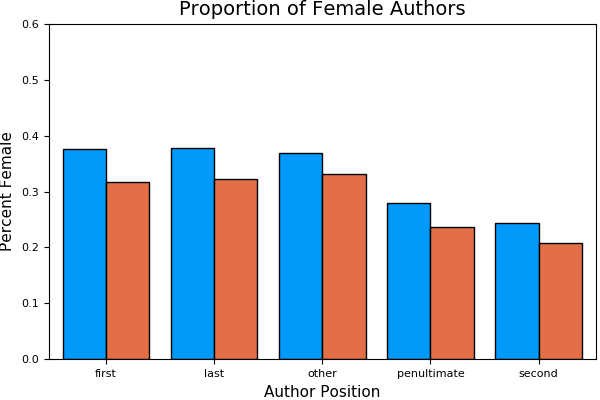

In [32]:
byposition = by(alldata, [:Position, :Dataset], df -> mean(dropna(df[:Pfemale])))
sort!(byposition, cols=:Position, lt=authororder)
ys = hcat([byposition[byposition[:Dataset] .== x, :x1] for x in levels(byposition[:Dataset])]...)

groupedbar(ys, bar_position=:dodge,
        xaxis=("Author Position", (1:5, levels(alldata[:Position]))),
        yaxis=("Percent Female", (0, 0.6), 0:0.1:0.6),
        legend=false,
        grid=false,
        title="Proportion of Female Authors")

To reiterate, these data suggest:

- Women are less likely to be authors than men
- Women are less likely to be first authors than second authors
- Women are less likely to be last authors than first authors
- this recapitulates previously published data that women are under-represented in biology publishing.

New finding: It seems to be worse in computational biology than in all of biology, though not by as much as I expected.

## Additional Annalysis

Let's see how this holds up. We can't do the "normal" sorts of statistics that folks often do (like T-tests, chi squared etc), since we're not taking a random sample of a population, we're looking at the whole population. An alternative is to use [bootstrap analysis](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), where we randomly resample the data a bunch of times, and get statistics on those samples. 

Happily, julia has a [bootstrap package](https://github.com/juliangehring/Bootstrap.jl) that does a lot of the work for us.

In [9]:
using Bootstrap

function getbootstrap(v, n=1000, i=0.95)
    bs = boot_basic(v, mean, n)
    return ci_basic(bs, i)
end

getbootstrap (generic function with 3 methods)


This function takes a vector of values `v` (like, say, a group of gender probabilities), and then samples them with replacement `n` times. In other words, if I had a vector `t = [1, 2, 3, 4, 5]` and I called getbootstrap(t), it would go through and take 5 samples at random... sometimes it would be `[5, 2, 4, 3, 3]`, sometimes `[1, 1, 1, 1, 1]` etc. It would do this 1000 times, getting the mean each time.

In [17]:
t = [1,2,3,4,5]
getbootstrap(t)

Bootstrap Confidence Interval
  Estimate: 3.0
  Interval: [1.7999999999999998,4.2]
  Level:    0.95
  Method:   basic


The estimate for the mean is 3, just as it should be, but I also get a confidence interval. That means that 95% of the time, the mean is between 1.8 and 4.2

I can use this to look at the author genders:

In [18]:
by(alldata, [:Dataset, :Position]) do df
    ci = getbootstrap(dropna(df[:Pfemale]))
    return DataFrame(Mean=ci.t0, Lower=interval(ci)[1], Upper=interval(ci)[2])
end

10×5 DataFrames.DataFrame
│ Row │ Dataset │ Position      │ Mean     │ Lower    │ Upper    │
├─────┼─────────┼───────────────┼──────────┼──────────┼──────────┤
│ 1   │ "bio"   │ "first"       │ 0.375575 │ 0.373348 │ 0.377716 │
│ 2   │ "bio"   │ "last"        │ 0.244588 │ 0.242536 │ 0.246703 │
│ 3   │ "bio"   │ "other"       │ 0.368088 │ 0.366597 │ 0.369577 │
│ 4   │ "bio"   │ "penultimate" │ 0.279369 │ 0.276726 │ 0.281746 │
│ 5   │ "bio"   │ "second"      │ 0.378591 │ 0.375999 │ 0.38096  │
│ 6   │ "comp"  │ "first"       │ 0.316339 │ 0.312081 │ 0.320495 │
│ 7   │ "comp"  │ "last"        │ 0.207292 │ 0.203215 │ 0.211043 │
│ 8   │ "comp"  │ "other"       │ 0.330706 │ 0.327961 │ 0.333685 │
│ 9   │ "comp"  │ "penultimate" │ 0.236174 │ 0.231642 │ 0.24084  │
│ 10  │ "comp"  │ "second"      │ 0.321791 │ 0.316779 │ 0.326524 │

That code takes the data, subsets it by `:Dataset` and `:Position` (that's the first two columns) and then returns the mean and 95% confidence intervals for each subset.

We can make generic functions for this, which you can find in `src/bootstrapping.jl`.

In [19]:
function bystats(df::DataFrame, by1::Symbol, n=1000, i=0.95)
    by(df, by1) do df2
        ci = getbootstrap(dropna(df2[:Pfemale]), n, i)
        return DataFrame(Mean=ci.t0, Lower=interval(ci)[1], Upper=interval(ci)[2])
    end
end

function bystats(df::DataFrame, cols::Vector{Symbol}, n=1000, i=0.95)
    by(df, cols) do df2
        ci = getbootstrap(dropna(df2[:Pfemale]), n, i)
        return DataFrame(Mean=ci.t0, Lower=interval(ci)[1], Upper=interval(ci)[2])
    end
end

bystats (generic function with 6 methods)

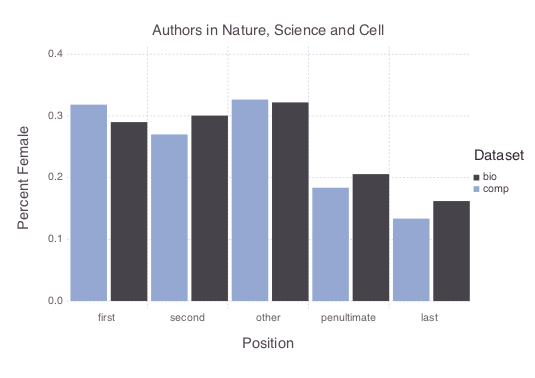

In [27]:
big3 = alldata[
    (alldata[:Journal] .== utf8("Nature"))|
    (alldata[:Journal] .== utf8("Science"))|
    (alldata[:Journal] .== utf8("Cell")), :]


big3byposition = bystats(big3, [:Position, :Dataset])


plot(big3byposition, x=:Position, y=:Mean, color=:Dataset, ymin=:Lower, ymax=:Upper,
Scale.color_discrete_manual(my_colors...),
            Geom.bar(position = :dodge), Guide.title("Authors in Nature, Science and Cell"),
            Guide.YLabel("Percent Female"),
            Scale.x_discrete(levels=["first", "second", "other", "penultimate", "last"]),
            Theme(bar_spacing=2mm))

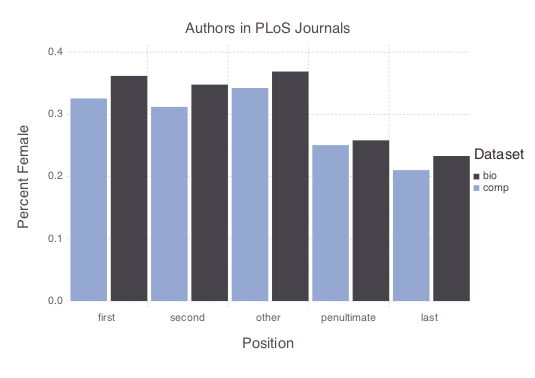

In [28]:
plos = alldata[map(x->contains(x, "PLoS"), alldata[:Journal]), :]

plosbyposition = by(plos, [:Position, :Dataset], df -> mean(dropna(df[:Pfemale])))

plot(plosbyposition, x=:Position, y=:x1, color=:Dataset,
Scale.color_discrete_manual(my_colors...),
                Geom.bar(position = :dodge), Guide.title("Authors in PLoS Journals"),
                Guide.YLabel("Percent Female"),
                Scale.x_discrete(levels=["first", "second", "other", "penultimate", "last"]),
                Theme(bar_spacing=2mm))

### Based on Journal Specialty

Another way to do this is to split by journals that tend to publish computational biology articles vs those that are more generalist. Here we'll only use the articles in the "bio" dataset to avoid double-dipping (the "comp" dataset is almost entirely a subset of "bio")

In [29]:
bioids = Set(levels(alldata[alldata[:Dataset] .== "bio", :ID]))
compids = Set(levels(alldata[alldata[:Dataset] .== "comp", :ID]))

println("There are $(length(bioids)) articles in the \"bio\" dataset")
println("There are $(length(compids)) articles in the \"comp\" dataset")

dif = length(setdiff(compids, bioids))

println("There are $dif articles in the \"comp\" dataset that aren't in the \"bio\" dataset")

There are 202816 articles in the "bio" dataset
There are 42880 articles in the "comp" dataset
There are 236 articles in the "comp" dataset that aren't in the "bio" dataset


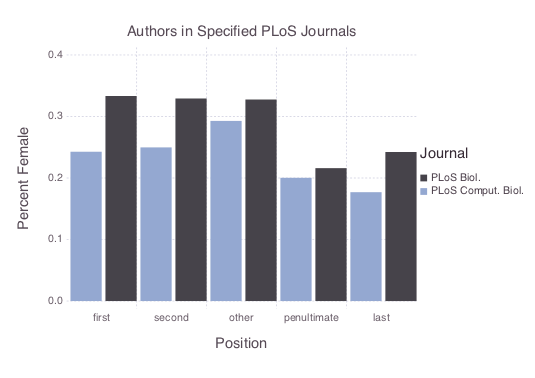

In [32]:
plosfocus = alldata[(alldata[:Dataset] .== "bio")&
    ((alldata[:Journal] .== utf8("PLoS Biol."))|
    (alldata[:Journal] .== utf8("PLoS Comput. Biol."))), :]

plosfocusbyposition = bystats(plosfocus, [:Position, :Journal])

plot(plosfocusbyposition, x=:Position, y=:Mean, color=:Journal,
                Scale.color_discrete_manual(my_colors...),
                Geom.bar(position = :dodge), Guide.title("Authors in Specified PLoS Journals"),
                Guide.YLabel("Percent Female"),
                Scale.x_discrete(levels=["first", "second", "other", "penultimate", "last"]),
                Theme(bar_spacing=2mm))

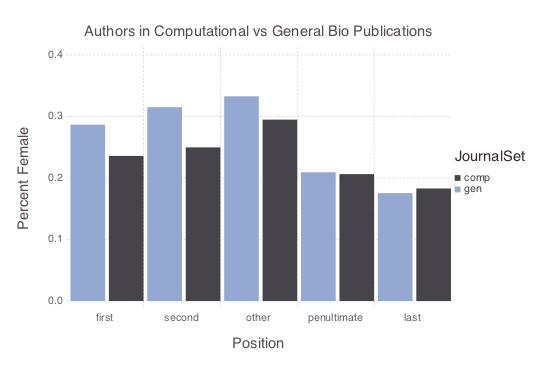

In [33]:
comppubs = alldata[(alldata[:Dataset] .== "bio")&
    ((alldata[:Journal] .== utf8("PLoS Comput. Biol."))| # impact factor 4.62
    (alldata[:Journal] .== utf8("Nucleic Acids Res."))| # 9.112
    (alldata[:Journal] .== utf8("BMC Bioinformatics"))| # 2.576
    (alldata[:Journal] .== utf8("Bioinformatics"))), :] # 4.981

genpubs = alldata[(alldata[:Dataset] .== "bio")&
    ((alldata[:Journal] .== utf8("Proc. Natl. Acad. Sci. U.S.A."))| # impact factor 9.674
    (alldata[:Journal] .== utf8("BMC Biol."))| # 9.112
    (alldata[:Journal] .== utf8("PLoS Biol."))| # 9.343
    (alldata[:Journal] .== utf8("Biol. Lett."))), :] # 3.248

comppubs[:JournalSet] = "comp"
genpubs[:JournalSet] = "gen"

pubs = vcat(comppubs, genpubs)
comppubs = 0
genpubs = 0


pubsbyposition = bystats(pubs, [:Position, :JournalSet])

plot(pubsbyposition, x=:Position, y=:Mean, color=:JournalSet,
                Scale.color_discrete_manual(my_colors...),
                Geom.bar(position = :dodge), Guide.title("Authors in Computational vs General Bio Publications"),
                Guide.YLabel("Percent Female"),
                Scale.x_discrete(levels=["first", "second", "other", "penultimate", "last"]),
                Theme(bar_spacing=2mm))

### Subsetting Conclusions

With a few exceptions, each of these subsets show a similar trend: women are less likely to be authors in computational biology publications. 

### Changes over time

Previous work suggests that female authorship has been increasing over time. Let's see if the trends hold over time as well.

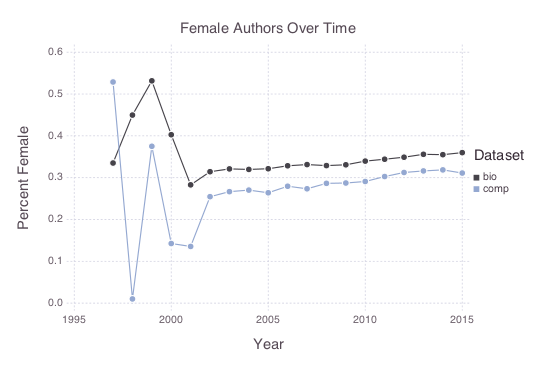

In [34]:
alldata[:Year] = map(x -> Dates.year(Date(x)), alldata[:Date])

byyear = bystats(alldata, [:Year, :Dataset])

plot(byyear, x=:Year, y=:Mean, color=:Dataset,
        Scale.color_discrete_manual(my_colors...),
        Geom.point, Geom.line, Guide.title("Female Authors Over Time"),
        Guide.YLabel("Percent Female"), Guide.XLabel("Year"))
    

What about in various author positions?

In [35]:
biobyyear = bystats(alldata[alldata[:Dataset] .== "bio", :], [:Year, :Position])

plot(biobyyear, x=:Year, y=:Mean, color=:Position,
        Scale.color_discrete_manual(my_colors...),
        Geom.point, Geom.line, Guide.title("Female Authors Over Time in Biology"),
        Guide.YLabel("Percent Female"), Guide.XLabel("Year"))
    

LoadError: LoadError: ArgumentError: quantiles are undefined in presence of NaNs
while loading In[35], in expression starting on line 1

In [36]:
compbyyear = bystats(alldata[alldata[:Dataset] .== "comp", :], [:Year, :Position])

plot(compbyyear, x=:Year, y=:Mean, color=:Position,
        Scale.color_discrete_manual(my_colors...),
        Geom.point, Geom.line, Guide.title("Female Authors Over Time In Computational Biology"),
        Guide.YLabel("Percent Female"), Guide.XLabel("Year"))

LoadError: LoadError: ArgumentError: quantiles are undefined in presence of NaNs
while loading In[36], in expression starting on line 1

Why does all the data suck before ~2002?

In [15]:
println("There are $(length(alldata[(alldata[:Year] .< 2002) & (alldata[:Dataset] .== "bio"), :Year])) pubs in the data set before 2002")
println("There are $(length(alldata[(alldata[:Year] .>= 2002) & (alldata[:Dataset] .== "bio"), :Year])) pubs in the data set after 2002")

for year in 1997:2015
    println("There are $(length(alldata[(alldata[:Year] .== year) & (alldata[:Dataset] .== "bio"), :Year])) pubs in the data set from $year")
end

There are 65587 pubs in the data set before 2002
There are 1046177 pubs in the data set after 2002
There are 6518 pubs in the data set from 1997
There are 9846 pubs in the data set from 1998
There are 11956 pubs in the data set from 1999
There are 15208 pubs in the data set from 2000
There are 22059 pubs in the data set from 2001
There are 24398 pubs in the data set from 2002
There are 33229 pubs in the data set from 2003
There are 45461 pubs in the data set from 2004
There are 54317 pubs in the data set from 2005
There are 58886 pubs in the data set from 2006
There are 65584 pubs in the data set from 2007
There are 73427 pubs in the data set from 2008
There are 84511 pubs in the data set from 2009
There are 99106 pubs in the data set from 2010
There are 110234 pubs in the data set from 2011
There are 119325 pubs in the data set from 2012
There are 124923 pubs in the data set from 2013
There are 133125 pubs in the data set from 2014
There are 19651 pubs in the data set from 2015


## Data from the arXiv

Previous work suggests that women are far less likely to publish in computer science. Unfortunately, pubmed doesn't index computer science research. 

The arXiv has preprints in many fields, including computer science. The sorts of papers posted here are likely to be different, so we can't compare directly to the stuff on pubmed, but there's also quantatative biology...

In [37]:

arxivcs = importauthors("../data/pubs/arxivcs.csv", "arxivcs")
arxivbio = importauthors("../data/pubs/arxivbio.csv", "arxivbio")

arxiv = vcat(arxivbio, arxivcs)
arxivcs = 0
arxivbio = 0

pool!(arxiv)
arxiv = arxiv[!isna(arxiv[:Author_Name]), :]

arxiv[:Pfemale], arxiv[:Count] = getgenderprob(arxiv, "../data/genders/genderAPI_genders.json", :Author_Name)


arxivbyposition = bystats(arxiv, [:Dataset, :Position])

10×5 DataFrames.DataFrame
│ Row │ Dataset    │ Position      │ Mean     │ Lower    │ Upper    │
├─────┼────────────┼───────────────┼──────────┼──────────┼──────────┤
│ 1   │ "arxivbio" │ "first"       │ 0.18388  │ 0.177958 │ 0.190444 │
│ 2   │ "arxivbio" │ "last"        │ 0.147743 │ 0.141191 │ 0.15446  │
│ 3   │ "arxivbio" │ "other"       │ 0.264536 │ 0.251599 │ 0.277382 │
│ 4   │ "arxivbio" │ "penultimate" │ 0.195796 │ 0.182806 │ 0.209202 │
│ 5   │ "arxivbio" │ "second"      │ 0.209705 │ 0.20037  │ 0.219252 │
│ 6   │ "arxivcs"  │ "first"       │ 0.157335 │ 0.154936 │ 0.159506 │
│ 7   │ "arxivcs"  │ "last"        │ 0.155346 │ 0.152847 │ 0.158017 │
│ 8   │ "arxivcs"  │ "other"       │ 0.188437 │ 0.182137 │ 0.194721 │
│ 9   │ "arxivcs"  │ "penultimate" │ 0.175397 │ 0.169881 │ 0.180958 │
│ 10  │ "arxivcs"  │ "second"      │ 0.17538  │ 0.171525 │ 0.178988 │

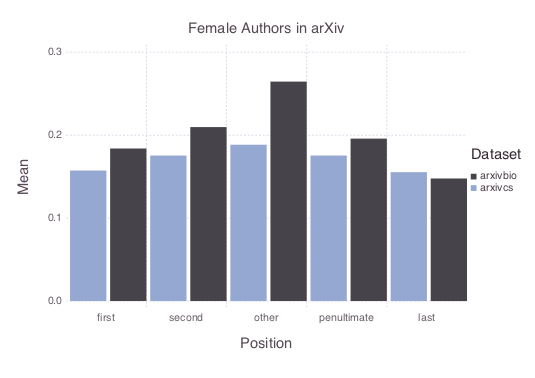

In [39]:
plot(arxivbyposition, x=:Position, y=:Mean, color=:Dataset,
        Scale.color_discrete_manual(my_colors...),
        Guide.title("Female Authors in arXiv"),
        Geom.bar(position = :dodge),
        Scale.x_discrete(levels=["first", "second", "other", "penultimate", "last"]),
        Theme(bar_spacing=2mm))

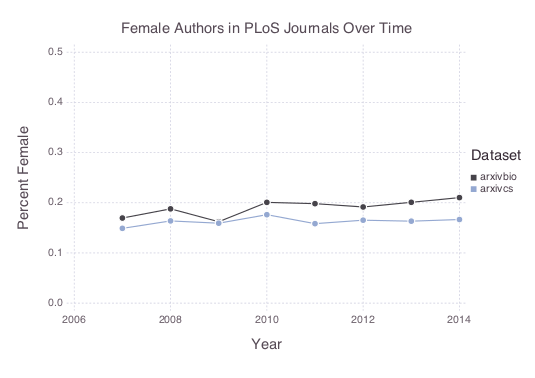

In [40]:
arxiv[:Year] = map(x -> Dates.year(Date(x)), arxiv[:Date])
arxivbyyear = bystats(arxiv, [:Year, :Dataset])

plot(arxivbyyear, x=:Year, y=:Mean, color=:Dataset,
        Scale.color_discrete_manual(my_colors...),
        Geom.point, Geom.line, Guide.title("Female Authors in PLoS Journals Over Time"),
        Guide.YLabel("Percent Female"), Guide.XLabel("Year"), Guide.yticks(ticks=[0:0.1:0.5]))